In [1]:
docs = [
        '여름엔 과일이 맛있다', 
        '여름엔 수박이 맛있다',
        '여름엔 바다지',
        '여름엔 과일이 맛없다']

#1. 데이터 변환

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
count_vect = vect.fit_transform(docs)
count_vect.toarray()

array([[1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 1]])

#2. 수식 구현

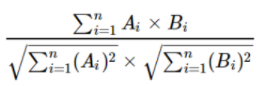

##2.1 분모 중 왼쪽 수식 Ai구현


In [ ]:
count_vect_array = count_vect.toarray()
count_vect_array

In [ ]:
import numpy as np

a = count_vect_array[0]
val_square = np.square(a)
val_square

> a가 가지고 있는 데이터 각각에 제곱을 처리했다.

In [8]:
val_square_sum = sum(val_square)
val_square_sum

3

> 각 데이터의 합을 구했다.

In [9]:
ai = np.sqrt(val_square_sum)
ai

1.7320508075688772

> 합에 대한 루트값을 구했다.

##2.2 분자 구하기

In [ ]:
count_vect_array

In [10]:
a = count_vect_array[0]
b = count_vect_array[1]
numerator = np.dot(a, b)
numerator

2

> 첫 번째 행을 a에 두 번째 행을 b에 저장하고 각 행의 데이터를 서로 곱한 후 합을 구한 것이다.

##2.3 Quiz
>문서 1과 문서 2의 유사도를 구하시오

In [12]:
#제곱
val_square = np.square(b)
#합
val_square_sum = sum(val_square)
#루트
bi = np.sqrt(val_square_sum)

In [13]:
cos_similarity = numerator / (ai*bi)
cos_similarity

0.6666666666666667

##2.4 Quiz2
>문서 1과 모든 문서의 유사도를 구하시오

In [14]:
def norm(v):
  val_square = np.square(v)
  val_square_sum = sum(val_square)
  return np.sqrt(val_square_sum)

v1 = count_vect_array[0]
n1 = norm(v1)
n1

1.7320508075688772

> 위의 기능이 중복되게 사용되어 함수화 처리하였다.

In [ ]:
for row in count_vect_array:
  n2 = norm(row)
  print(n2)

> 간단하게 함수를 활용한 결과를 확인해 보았다.

In [16]:
for row in count_vect_array:
  n2 = norm(row)
  cos_similarity = np.dot(v1, row) / (n1*n2)
  print(cos_similarity)

1.0000000000000002
0.6666666666666667
0.40824829046386296
0.6666666666666667


> 문서 1에 대한 각 문서별 유사도를 위와 같이 구할 수 있다.

## 2.5 Quiz3

In [18]:
docs2 = [
        '여름엔 과일이 맛있다 여름엔 과일이 맛있다', 
        '여름엔 수박이 맛있다',
        '여름엔 바다지',
        '여름엔 과일이 맛없다'
        ]

###2.5.1 함수화

In [21]:
def getArray(docs, vect):
  count_vect = vect.fit_transform(docs)
  return count_vect.toarray()

def norm(v):
  return np.sqrt(sum(np.square(v)))

def cos_similarity(v1, v2):
  return np.dot(v1, v2) / (norm(v1)*norm(v2))
  

###5.2.2 유사도 확인

In [22]:
count_vect_array = getArray(docs2, vect)
v1 = count_vect_array[0]

for row in count_vect_array:
  print(cos_similarity(v1, row))

1.0000000000000002
0.6666666666666667
0.40824829046386296
0.6666666666666667
